In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score
)
# Set random seed for reproducibility
np.random.seed(42)
import joblib

print("The above libraries have been imported successfully!")

The above libraries have been imported successfully!


# Load and Explore the Iris Dataset

In [36]:
# Load the iris dataset
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [37]:
# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].map(dict(enumerate(iris.target_names)))
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [38]:
# Display iris feature_names
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

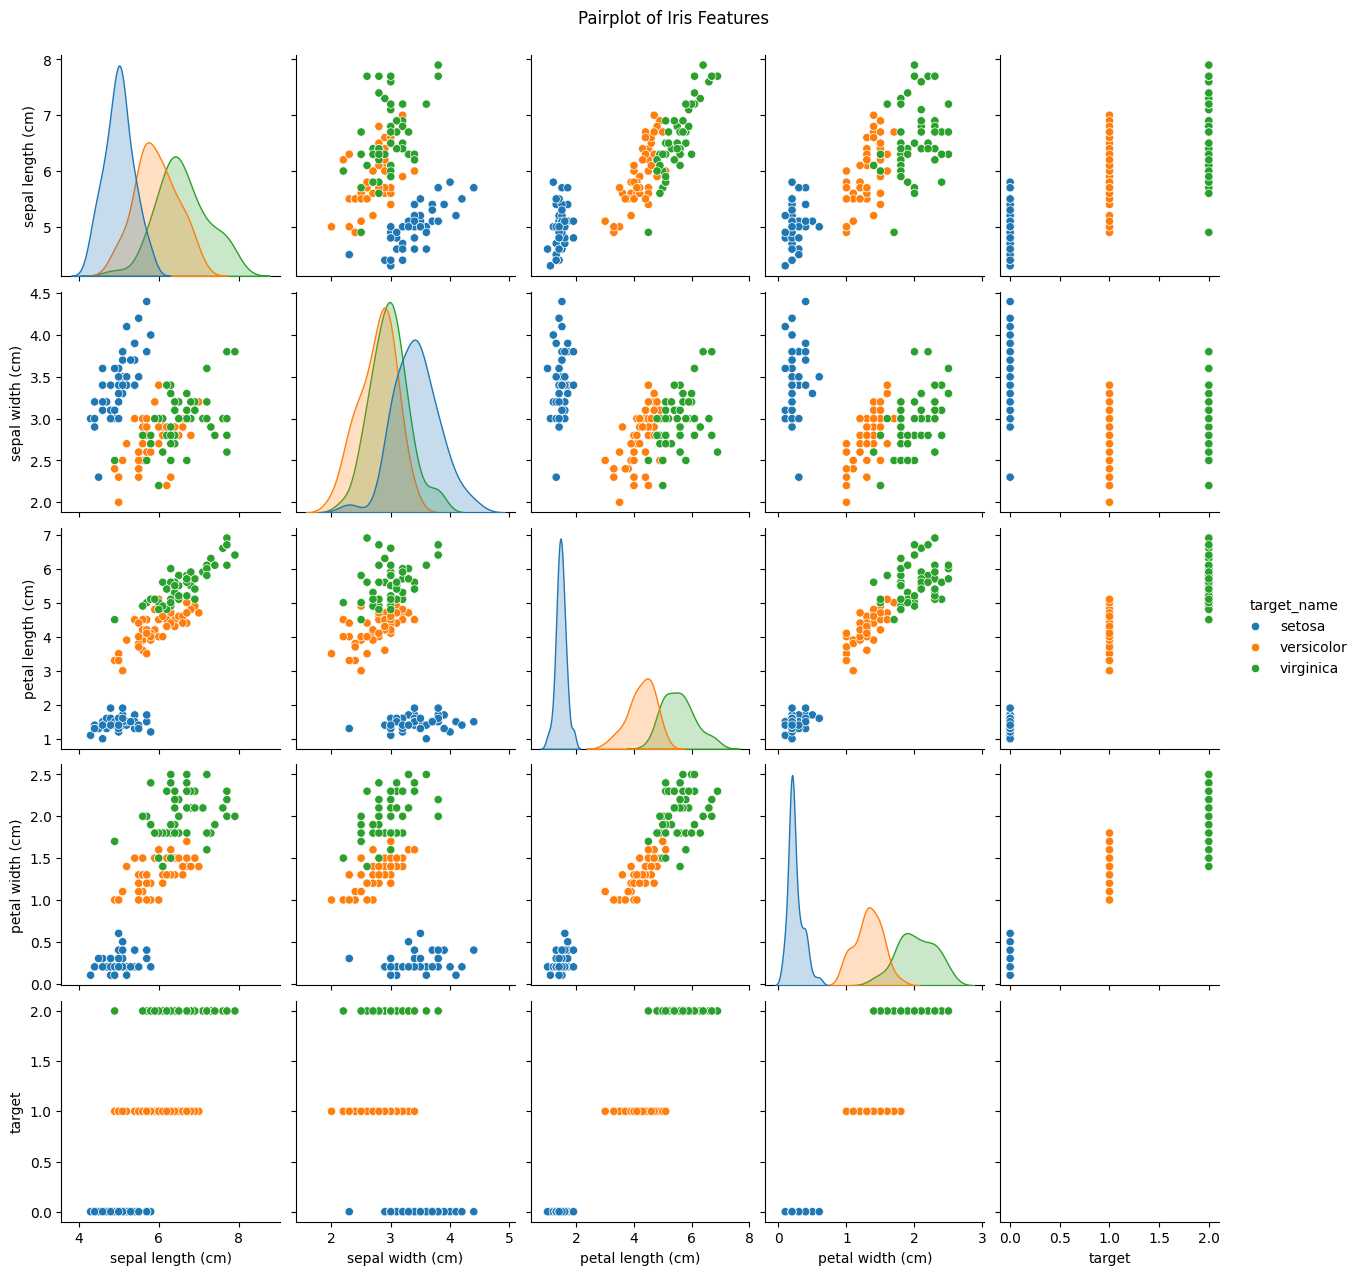

In [39]:
# Pairplot to see the class separation
sns.pairplot(df, hue='target_name', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# Build the Model

In [40]:
# Convert to DataFrame
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
y = df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

# Split the Model into Train(80%) and Test(20%)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
model = LogisticRegression(max_iter=1000, solver="lbfgs") 
# Quasi-Newton method 'lbfgs' supports Multiclass problems, medium-sized datasets 

# Fit the model to the training data
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

# Testing the Model 

In [44]:
y_pred = model.predict(x_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.97


In [45]:
# Classification report
print("\nReport of Classification:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Report of Classification:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Key Metrics:
*Precision*: How many of the predicted labels are actually correct?

*Recall*: How many of the actual labels were correctly identified?

*F1-score*: Harmonic mean of Precision and Recall — balances both.

*Support*: The number of true samples for each class.

## Interpretation 

### Setosa:

Perfectly predicted (no false positives or false negatives).

Precision, recall, and F1-score all at 1.00 → excellent!

### Versicolor:

Precision = 1.00 → all predicted versicolors were correct.

Recall = 0.90 → one actual versicolor was not predicted as such.

F1-score = 0.95 → very good overall, slight drop due to recall.

### Virginica:

Precision = 0.91 → a couple of predictions for virginica were incorrect (some false positives).

Recall = 1.00 → all actual virginicas were correctly predicted.

F1-score = 0.95 → strong performance.

# Confusion Matrix Visualization

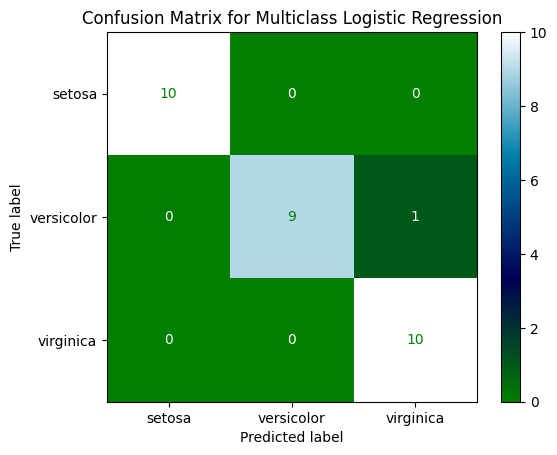

In [51]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="ocean")
plt.title("Confusion Matrix for Multiclass Logistic Regression")
plt.show()

### Summary
- Logistic Regression achieved high accuracy on the Iris dataset.
- The confusion matrix and classification report confirm good performance.
- Feature importance can be interpreted from the coefficients plot.

# Save Model

In [19]:
joblib.dump(model, "Logistic Regression Model.joblib")

['Logistic Regression Model.joblib']

# Test Model with New Data

In [22]:
loaded_model = joblib.load('Logistic Regression Model.joblib')

In [31]:
sample = [[5.9, 3. , 5.1, 1.8]]
y_pred = model.predict(sample)

C:\Users\mdola\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [32]:
print(y_pred)

[2]
